In [4]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 7134 images belonging to 3 classes.
Found 206 images belonging to 3 classes.


In [5]:

# create model structure
RPS_model = Sequential()

RPS_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
RPS_model.add(Flatten())
RPS_model.add(Dense(1024, activation='relu'))
RPS_model.add(Dropout(0.5))
RPS_model.add(Dense(3, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

RPS_model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [6]:
import matplotlib.pyplot as plt

# Define the number of training epochs
epochs = 100  # Specify the total number of training epochs

# Create empty lists to store training history
train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []

# Training loop for the specified number of epochs
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    
    # Fit the model for one epoch
    history = RPS_model.fit(
        train_generator,
        steps_per_epoch=7145 // 64,  # Adjust based on your batch size
        epochs=1,  # Train for one epoch at a time
        validation_data=validation_generator,
        validation_steps=206 // 64  # Adjust based on your batch size
    )
    
    # Append training metrics to the lists
    train_loss.append(history.history['loss'][0])  # [0] is used to get the value for the current epoch
    val_loss.append(history.history['val_loss'][0])  
    train_accuracy.append(history.history['accuracy'][0])  
    val_accuracy.append(history.history['val_accuracy'][0])  




Epoch 1/100
111/111 [==============================] - 37s 332ms/step - loss: 1.5892 - accuracy: 0.3851 - val_loss: 1.0597 - val_accuracy: 0.3854
Epoch 2/100
111/111 [==============================] - 42s 377ms/step - loss: 0.9871 - accuracy: 0.5140 - val_loss: 0.9751 - val_accuracy: 0.4583
Epoch 3/100
111/111 [==============================] - 41s 367ms/step - loss: 0.8329 - accuracy: 0.6286 - val_loss: 0.9499 - val_accuracy: 0.5312
Epoch 4/100
111/111 [==============================] - 41s 368ms/step - loss: 0.6705 - accuracy: 0.7307 - val_loss: 0.9589 - val_accuracy: 0.5781
Epoch 5/100
111/111 [==============================] - 40s 359ms/step - loss: 0.5286 - accuracy: 0.8040 - val_loss: 0.8814 - val_accuracy: 0.5885
Epoch 6/100
111/111 [==============================] - 40s 358ms/step - loss: 0.4182 - accuracy: 0.8552 - val_loss: 0.8907 - val_accuracy: 0.6302
Epoch 7/100
111/111 [==============================] - 42s 378ms/step - loss: 0.3549 - accuracy: 0.8836 - val_loss: 0.9396 -

Epoch 57/100
111/111 [==============================] - 41s 370ms/step - loss: 0.1407 - accuracy: 0.9235 - val_loss: 1.1763 - val_accuracy: 0.6562
Epoch 58/100
111/111 [==============================] - 43s 383ms/step - loss: 0.1471 - accuracy: 0.9173 - val_loss: 1.1136 - val_accuracy: 0.6823
Epoch 59/100
111/111 [==============================] - 44s 393ms/step - loss: 0.1395 - accuracy: 0.9263 - val_loss: 1.1386 - val_accuracy: 0.6562
Epoch 60/100
111/111 [==============================] - 45s 405ms/step - loss: 0.1444 - accuracy: 0.9214 - val_loss: 1.0686 - val_accuracy: 0.6510
Epoch 61/100
111/111 [==============================] - 46s 419ms/step - loss: 0.1361 - accuracy: 0.9243 - val_loss: 1.1763 - val_accuracy: 0.6458
Epoch 62/100
111/111 [==============================] - 48s 434ms/step - loss: 0.1389 - accuracy: 0.9239 - val_loss: 1.1468 - val_accuracy: 0.6250
Epoch 63/100
111/111 [==============================] - 49s 444ms/step - loss: 0.1440 - accuracy: 0.9212 - val_loss: 1

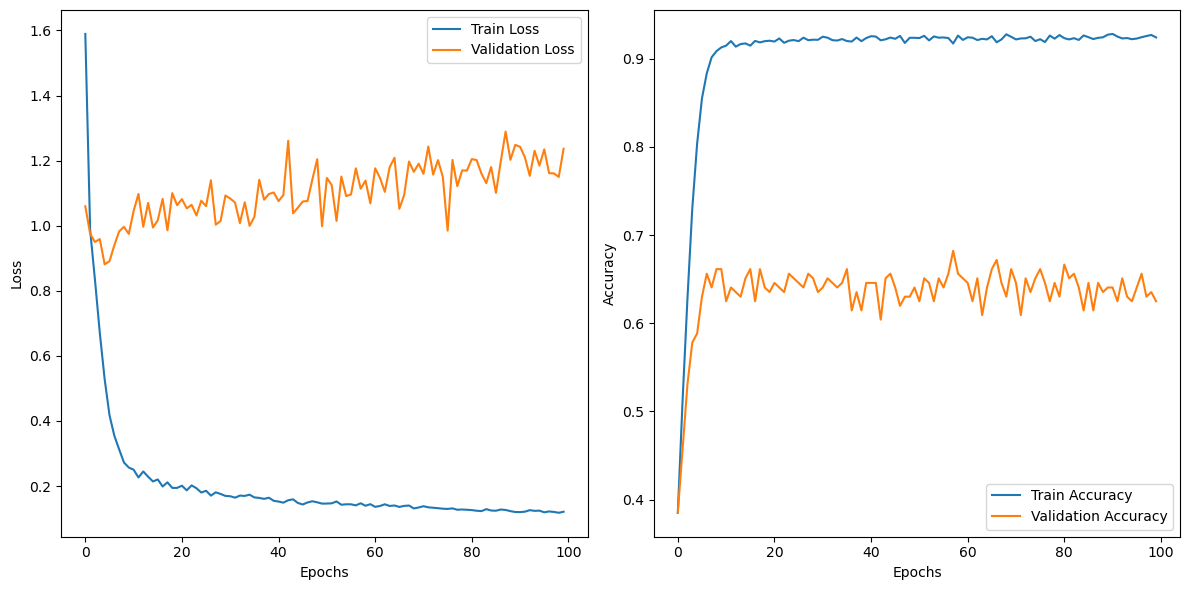

<Figure size 640x480 with 0 Axes>

In [7]:
# After all epochs are completed, draw the chart
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss, label='Train Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracy, label='Train Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('training_progress_relu_fewerlesslayers.png')

In [8]:
# save model structure in jason file
model_json = RPS_model.to_json()
with open("RPS_model_fewerlesslayers.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
RPS_model.save_weights('RPS_model_fewerlesslayers.h5')